# Sampling from a Bayesian network: an open problem

A Bayesian network encodes a probability distribution. It is often desirable to be able to sample from a Bayesian network. The most common way to do this is via forward sampling (also called prior sampling). It's a really dumb algorithm that is trivial to implement. You just loop over the nodes in breadth-first order and sample a value each node, conditioning on the parents (which have already been sampled).

The problem with forward sampling is that impossible situations can arise for some networks. Basically, forward sampling doesn't ensure that the produced samples are *valid*. The easiest way to grok this is via some examples. 

## Example 1 

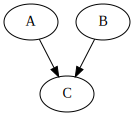

In [5]:
import hedgehog as hh
import pandas as pd

def example_1():

    X = pd.DataFrame(
        [
            [True, True, True],
            [False, False, False]
        ],
        columns=['A', 'B', 'C']
    )

    bn = hh.BayesNet(
        (['A', 'B'], 'C')
    )
    bn.fit(X)

    return bn

bn = example_1()
bn

In [6]:
bn.full_joint_dist()

A      B      C    
False  False  False    0.5
True   True   True     0.5
Name: P(A, B, C), dtype: float64

The problem with forward sampling is this case is that if we sample from A and then B independently, then we can end up by sampling pairs (A, B) that don't exist. This will raise an error when we condition P(C) on its parents.

In `hedhehog`, this will raise a `KeyError` when `sample` is called because the distribution that corresponds to `(A=False, B=True)` doesn't exist.

In [4]:
while True:
    try:
        bn.sample()
    except KeyError:
        print('Yep, told you.')
        break

Yep, told you.


## Example 2

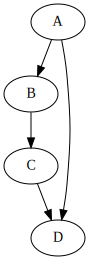

In [12]:
import hedgehog as hh
import pandas as pd

def example_2():

    X = pd.DataFrame(
        [
            [1, 1, 1, 1],
            [2, 1, 2, 1]
        ],
        columns=['A', 'B', 'C', 'D']
    )

    bn = hh.BayesNet(
        ('A', 'B'),
        ('B', 'C'),
        (['A', 'C'], 'D')
    )
    bn.fit(X)

    return bn

bn = example_2()
bn

In this case, a problem will occur if we sample `(A, 1)`, then `(B, 1)`, then `(C, 2)`. Indeed, `(A, 1)` and `(C, 1)` have never been seen so there's now way of sampling `D`.

In [15]:
while True:
    try:
        bn.sample()
    except KeyError:
        print('Yep, told you.')
        break

Yep, told you.


One way to circumvent these issues would be to sample from the full joint distribution. But this is too costly. Another way is to add a prior distribution by supposing that every combination occurred once, but that's not elegant.

Ideally we would like to have some way of doing forward sampling that only produces valid data. This is still an open question for me.